In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

In [2]:
'''Generate 2d data'''
c = [[0, 0], [5, 5]]
X, y = make_blobs(n_samples = 50, centers = c, n_features = 2, random_state = 0)

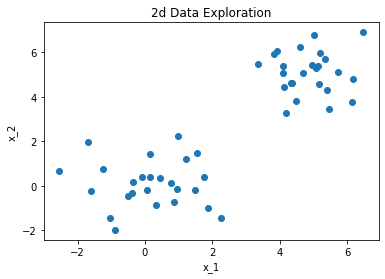

In [3]:
plt.scatter(X[:, 0], X[:, 1])
plt.title('2d Data Exploration')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

## 1. Normalization / Center the data

In [4]:
'Find mean'
X_mean = X.mean(axis = 0)
X_mean

array([2.51680616, 2.60280987])

In [5]:
'Subtract the mean from original data'
X_centered = X - X_mean

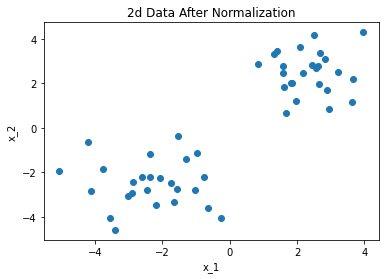

In [6]:
plt.scatter(X_centered[:, 0], X_centered[:, 1])
plt.title('2d Data After Normalization')
plt.xlabel('x_1')
plt.ylabel('x_2')
plt.show()

## 2. Find covariance matrix

In [7]:
covariance = np.cov(X_centered.T)
covariance

array([[6.64636771, 5.93157996],
       [5.93157996, 7.35408367]])

## 3. find eigenvectors

In [8]:
eig_val, eig_vec = np.linalg.eig(covariance)

In [9]:
'''Eigenvalues '''
eig_val

array([ 1.05810012, 12.94235126])

In [10]:
'''
Variance percentage
The eigenvalues return with no order
We can tell the second principle component can explain 92% of variance
'''
np.round(eig_val / eig_val.sum(), 2)

array([0.08, 0.92])

In [11]:
'''eig_vec[:, i] -> the ith eigenvectors corresponding to the ith eigenvalues'''
eig_vec

array([[-0.7278567 , -0.68572927],
       [ 0.68572927, -0.7278567 ]])

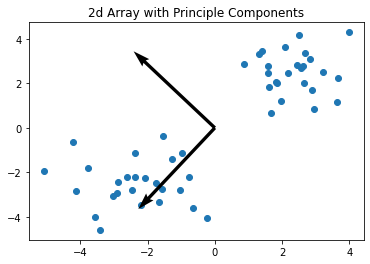

In [12]:
plt.scatter(X_centered[:, 0], X_centered[:, 1])
plt.quiver([0]*2, [0]*2, eig_vec[:,1], eig_vec[:,0], zorder=11, 
           width=0.01, scale=3)
plt.title('2d Array with Principle Components')
plt.show()

## 4. Project the data

In [13]:
X_projected = X_centered.dot(eig_vec.T)

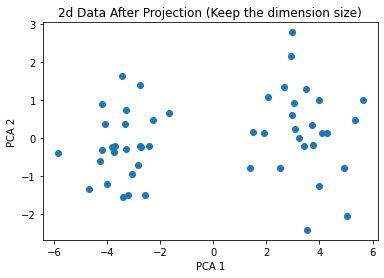

In [14]:
plt.scatter(X_projected[:, 0], X_projected[:, 1])
plt.title('2d Data After Projection (Keep the dimension size)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## 5. Dimension reduction

In [15]:
'''
Here we only use the second principle component which can explain 92% variance
'''
X_d = X_centered.dot(eig_vec[:, 1].T)

In [16]:
'Now pca2 should be all 0'
X_d_pca2 = np.zeros_like(X_d)

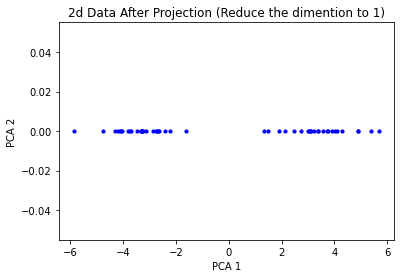

In [17]:
plt.scatter(X_d, X_d_pca2, s = 10, c = 'b')
plt.title('2d Data After Projection (Reduce the dimention to 1)')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()

## 6. Use pca in library to test our result

In [18]:
from sklearn.decomposition import PCA
pca_library = PCA()
pca_result = pca_library.fit(X)
X_projected_library = pca_library.transform(X)

In [19]:
pca_result.components_

array([[ 0.68572927,  0.7278567 ],
       [-0.7278567 ,  0.68572927]])

In [20]:
'''In library, the output is in order'''
pca_result.explained_variance_

array([12.94235126,  1.05810012])

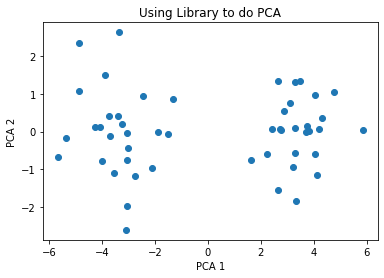

In [21]:
'''We got similar result but a reverse order'''
plt.scatter(X_projected_library[:, 0], X_projected_library[:, 1])
plt.title('Using Library to do PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.show()